# Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [9]:
df_filtered = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\data\\df_filtered.csv')

df_filtered.head()

,City,FuelType,BodyType,KmsDriven,TransmissionType,NumberOwner,Insurance,Manufacturer,CarModel,ModelYear,VariantName,Mileage,Engine,Price,No of Cylinder,Seats,AgeOfCar
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Third Party,Maruti,Maruti Celerio,2015,VXI,23,998,400000,3,5,9
1,Bangalore,Petrol,SUV,32706,Manual,2,Comprehensive,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,17,1497,811000,3,5,6
2,Bangalore,Petrol,Hatchback,11949,Manual,1,Comprehensive,Tata,Tata Tiago,2018,1.2 Revotron XZ,23,1199,585000,3,5,6
3,Bangalore,Petrol,Sedan,17794,Manual,1,Comprehensive,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,19,1197,462000,4,5,10
4,Bangalore,Diesel,SUV,60000,Manual,1,Third Party,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,23,1248,790000,4,5,9


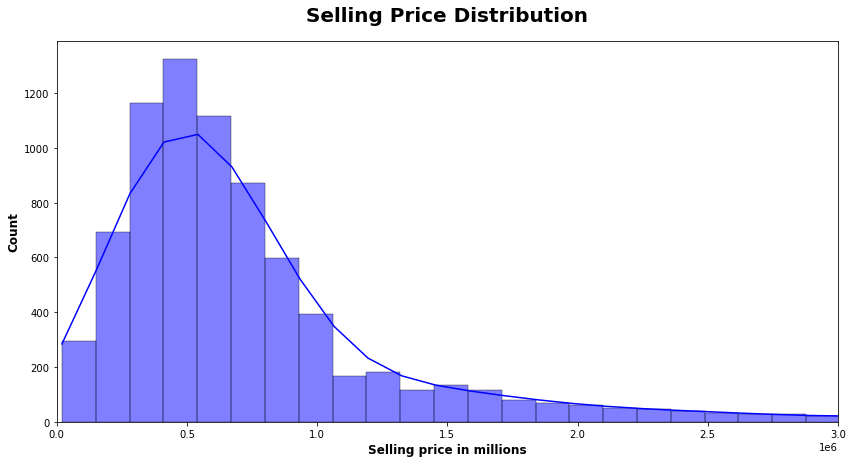

In [10]:
plt.subplots(figsize=(14,7))
sns.histplot(df_filtered.Price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

### Top 10 Sold Cars on CarDekho Website

In [11]:
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)

df_filtered.CarModel.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


Honda City            366
Maruti Swift          347
Hyundai i20           328
Maruti Baleno         291
Hyundai Grand i10     259
Maruti Wagon R        248
Maruti Swift Dzire    248
Hyundai i10           179
Hyundai Verna         179
Honda Amaze           174
Name: CarModel, dtype: int64

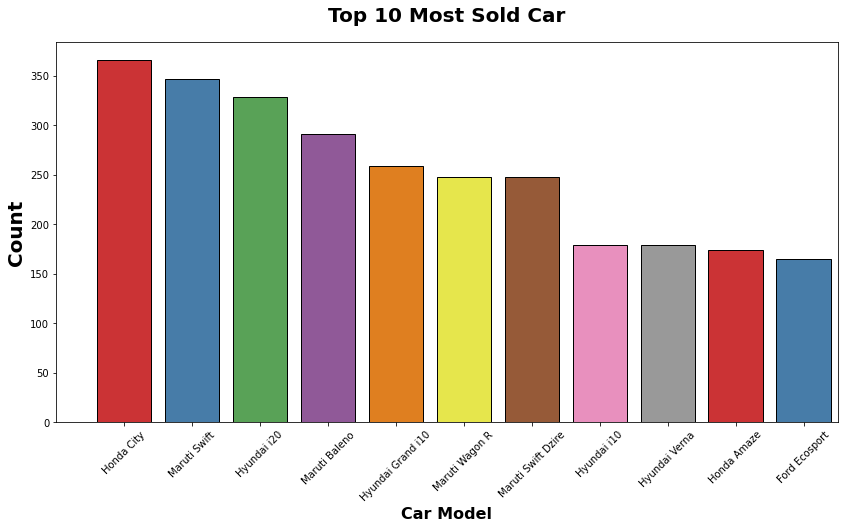

In [12]:
plt.subplots(figsize=(14,7))
sns.countplot(x="CarModel", data=df_filtered,ec = "black",palette="Set1",order = df_filtered['CarModel'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Model", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [13]:
most_sold_car_model = df_filtered['CarModel'].value_counts().index[0]

topSold = df_filtered[df_filtered['CarModel'] == most_sold_car_model]['Price'].mean()
print(f'The mean price of {most_sold_car_model} is {topSold:.2f} Rupees')

The mean price of Honda City is 696751.37 Rupees


### Top 10 Most Sold Car Brand

In [14]:
print('-'*50)
print('Top 10 Most Sold Car Brand')
print('-'*50)

df_filtered.Manufacturer.value_counts()[0:10]

--------------------------------------------------
Top 10 Most Sold Car Brand
--------------------------------------------------


Maruti           2206
Hyundai          1549
Honda             855
Tata              411
Mahindra          320
Toyota            311
Renault           309
Ford              305
Volkswagen        283
Mercedes-Benz     207
Name: Manufacturer, dtype: int64

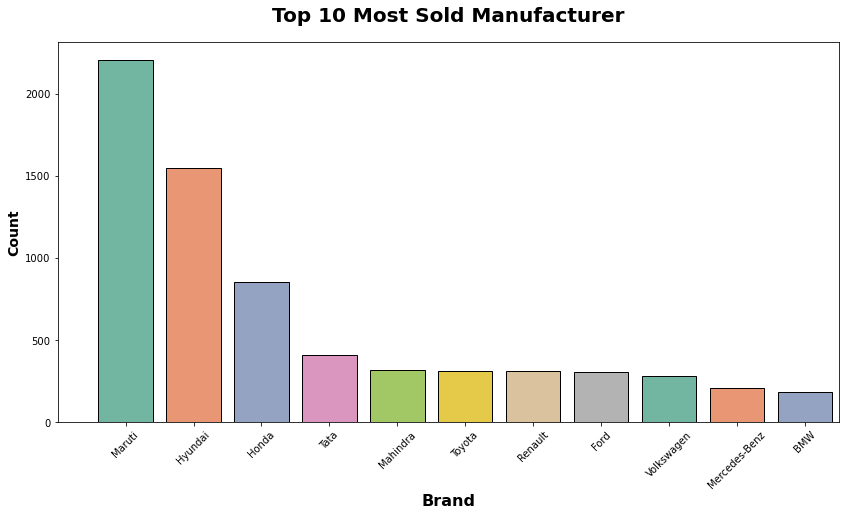

In [15]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Manufacturer", data=df_filtered,ec = "black",palette="Set2",order = df_filtered['Manufacturer'].value_counts().index)
plt.title("Top 10 Most Sold Manufacturer", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

### Top 10 Costlier Brands on CarDekho Website

In [16]:
brand = df_filtered.groupby('Manufacturer').Price.max()
brand = brand.to_frame().sort_values('Price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Brands on CarDekho Website')
print('-'*50)

brand

--------------------------------------------------
Top 10 Costlier Brands on CarDekho Website
--------------------------------------------------


,Price
Manufacturer,
Land Rover,26000000
Mercedes-Benz,24500000
Porsche,15000000
BMW,13000000
Audi,9100000
Lexus,8800000
Volvo,8200000
Jaguar,6400000
Jeep,6250000


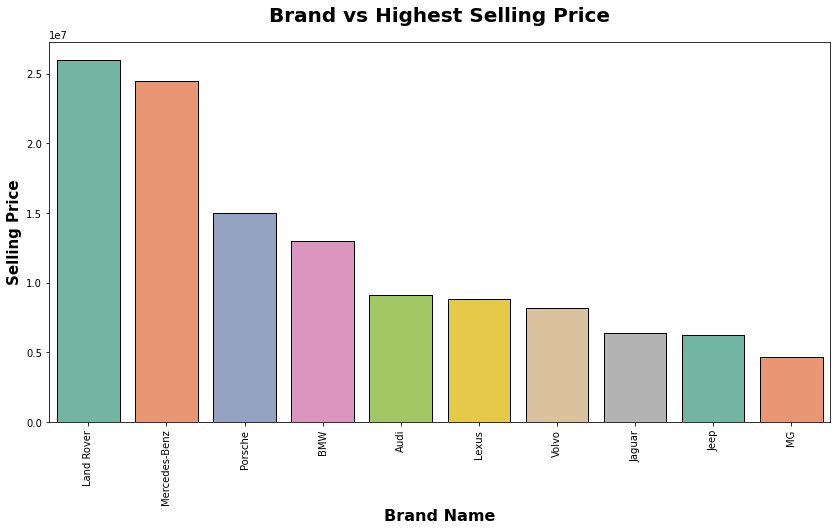

In [17]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.Price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

# Top 10 Costlier Cars on CarDekho Website

In [18]:
car= df_filtered.groupby('CarModel').Price.max()
car =car.to_frame().sort_values('Price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Cars on CarDekho Website')
print('-'*50)

car

--------------------------------------------------
Top 10 Costlier Cars on CarDekho Website
--------------------------------------------------


,Price
CarModel,
Land Rover Range Rover,26000000
Mercedes-Benz G,24500000
Mercedes-Benz AMG GT,21000000
Mercedes-Benz S-Class,15900000
Porsche 911,15000000
Land Rover Defender,13200000
BMW X7,13000000
BMW 7 Series,10500000
Land Rover Range Rover Sport,10300000


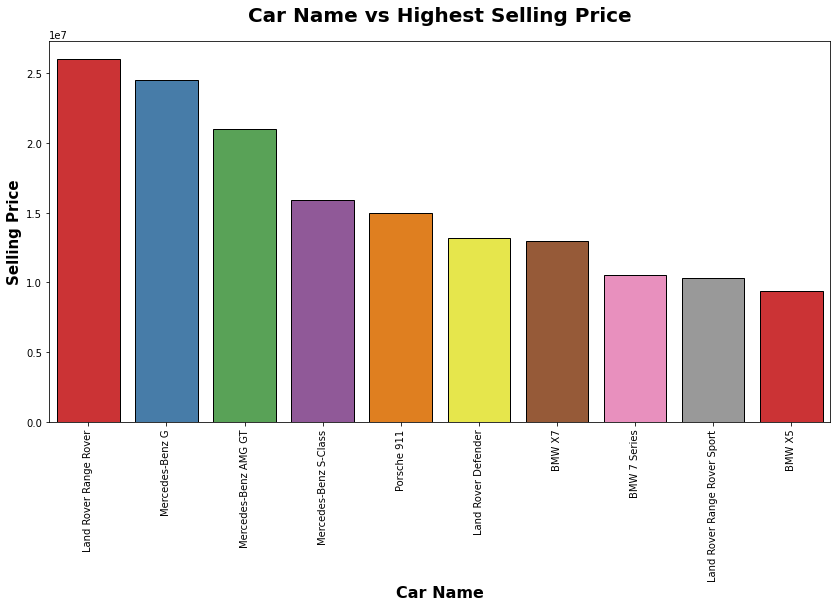

In [19]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.Price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

# Most Mileage Car Brand on CarDekho Website

In [20]:
mileage= df_filtered.groupby('CarModel')['Mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand on CarDekho Website')
print('-'*50)

mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand on CarDekho Website
--------------------------------------------------


,Mileage
CarModel,
Mahindra e2o Plus,140.000000
Honda City Hybrid,26.000000
Tata Nano,25.454545
Maruti Celerio,24.649007
Renault Pulse,23.000000
Maruti Alto K10,22.951220
Renault KWID,22.825503
Maruti Alto 800,22.740741
Maruti Swift Dzire Tour,22.714286


# Most Mileage Car

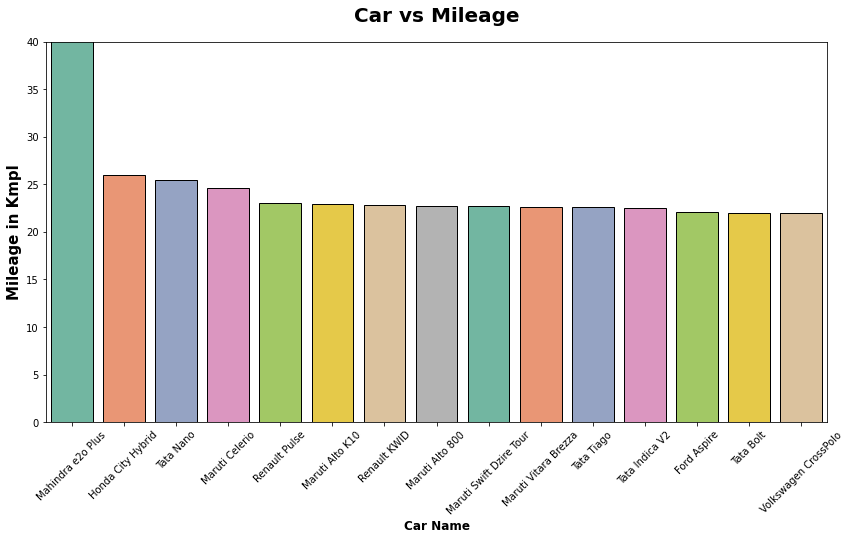

In [21]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Car vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,40)
plt.xticks(rotation=45)
plt.show()

# Selling Price and Kilometer Driven

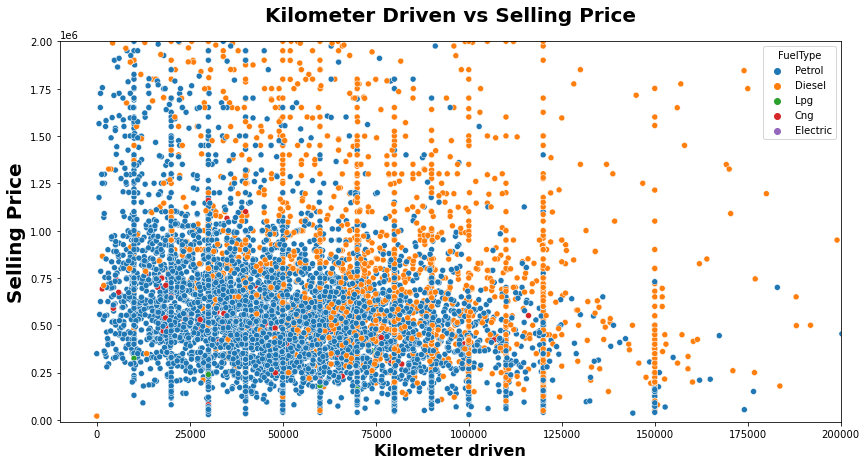

In [22]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="KmsDriven", y='Price', data=df_filtered, ec = "white", color='b', hue='FuelType')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,200000) #used limit for better visualization
plt.ylim(-10000,2000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

### Fuel type vs Selling Price

In [23]:
fuel = df_filtered.groupby('FuelType')['Price'].median().sort_values(ascending=False)
fuel.to_frame()

,Price
FuelType,
Diesel,800000.0
Petrol,544000.0
Cng,498000.0
Electric,460000.0
Lpg,220000.0


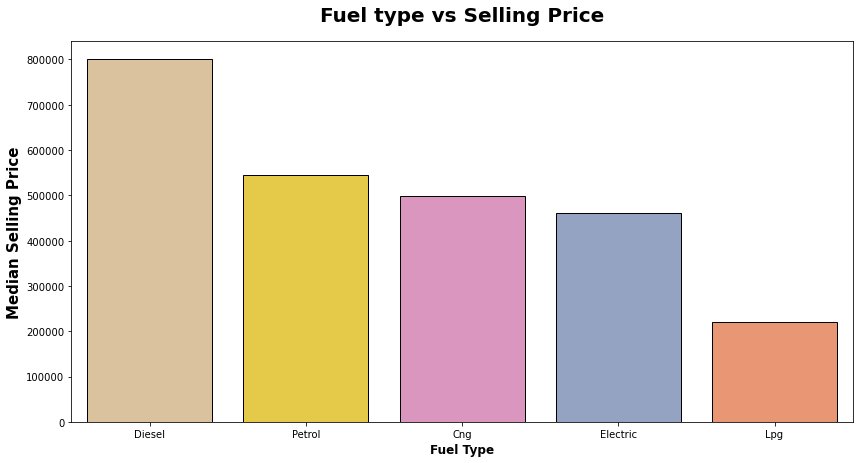

In [24]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Fuel Type Count

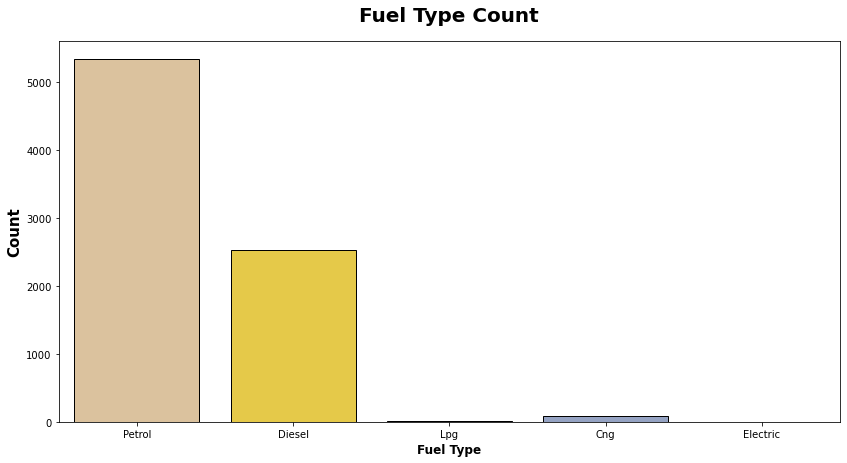

In [25]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df_filtered.FuelType, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Fuel type vs Mileage

In [26]:
fuel_mileage = df_filtered.groupby('FuelType')['Mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

df_filtered.Mileage.describe()

count    7966.000000
mean       18.838940
std         3.918734
min         7.000000
25%        17.000000
50%        18.000000
75%        21.000000
max       140.000000
Name: Mileage, dtype: float64

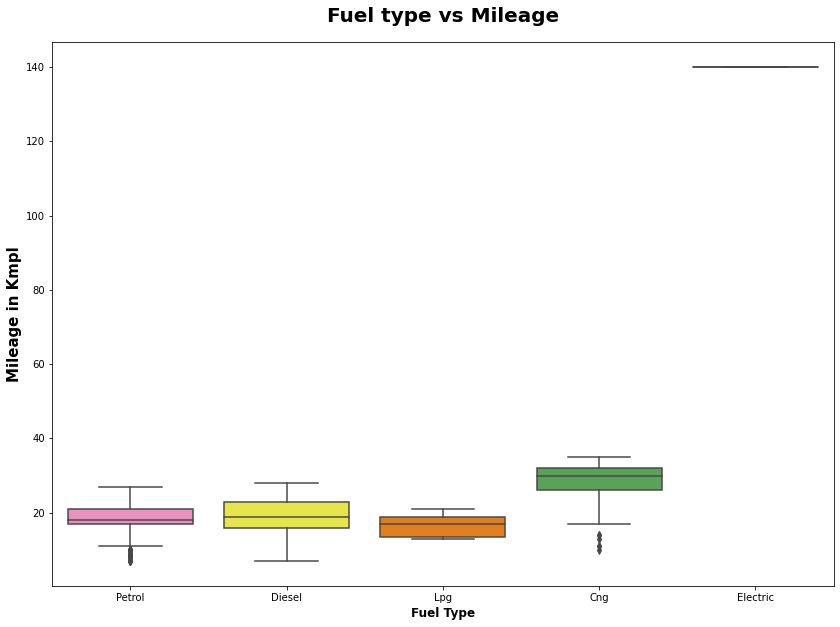

In [28]:
plt.subplots(figsize=(14,10))
sns.boxplot(x='FuelType', y='Mileage', data=df_filtered, palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

### Mileage vs Selling Price

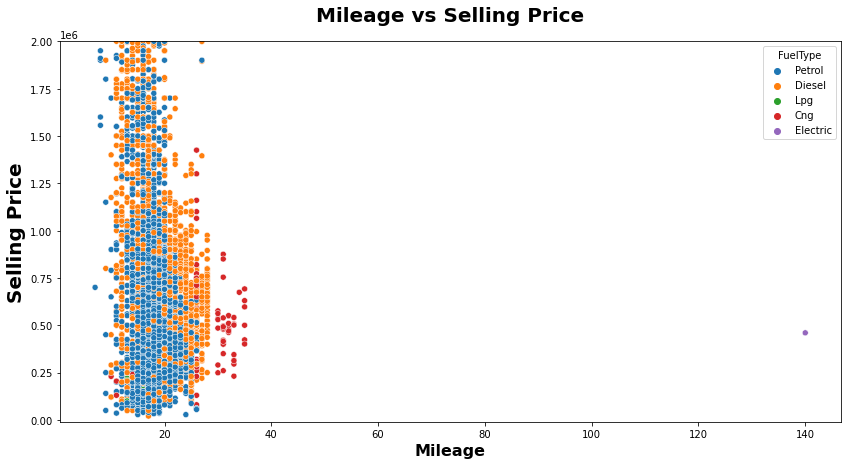

In [29]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="Mileage", y='Price', data=df_filtered,ec = "white",color='b', hue='FuelType')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,2000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

# Mileage Distribution

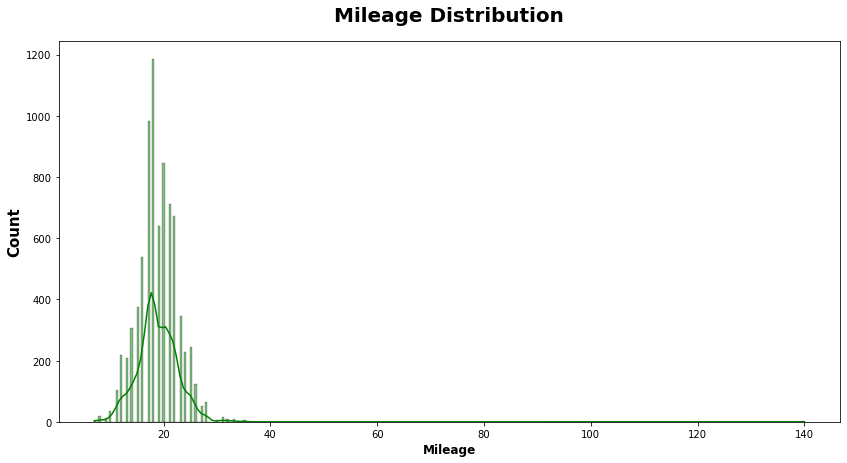

In [30]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df_filtered.Mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

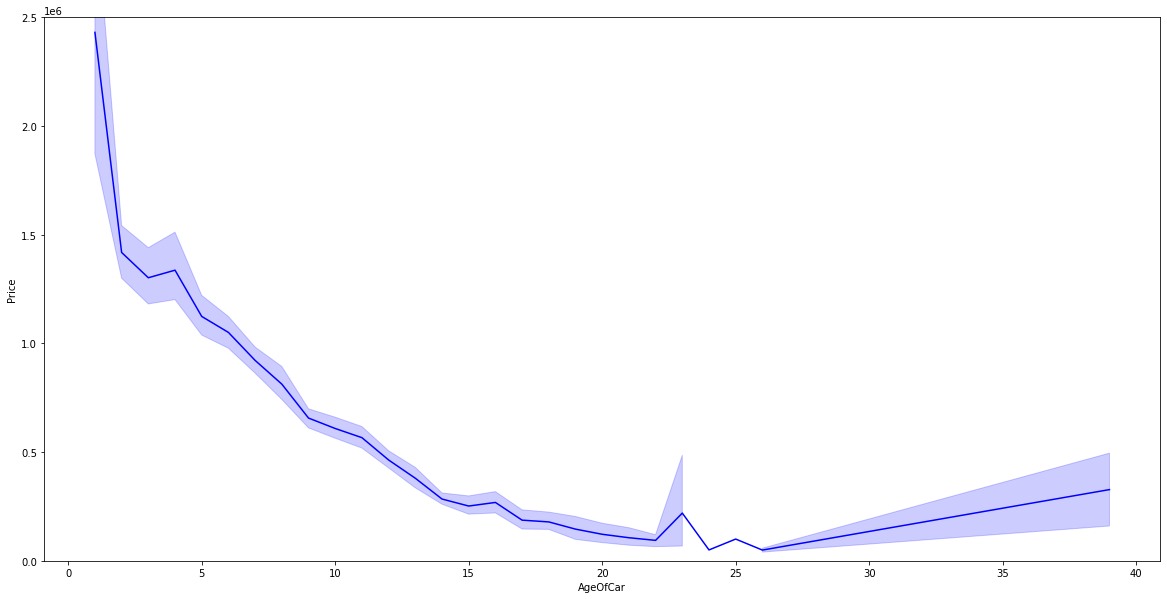

In [31]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='AgeOfCar',y='Price',data=df_filtered,color='b')
plt.ylim(0,2500000)
plt.show()

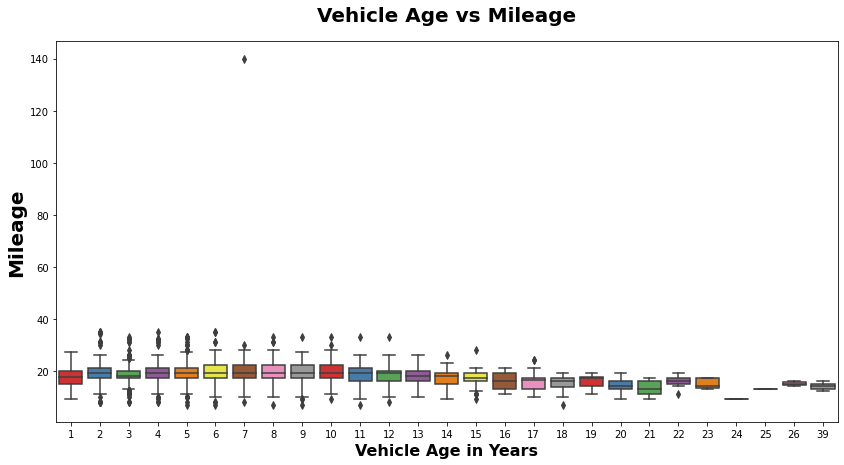

In [32]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df_filtered.AgeOfCar, y= df_filtered.Mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

In [33]:
oldest = df_filtered.groupby('CarModel')['AgeOfCar'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,AgeOfCar
CarModel,
Ambassador,39
Maruti 800,39
Maruti 1000,26
Maruti Omni,26
Honda City,25
Ford Mondeo,24
Maruti Zen,23
Mitsubishi Lancer,23
Toyota Qualis,23


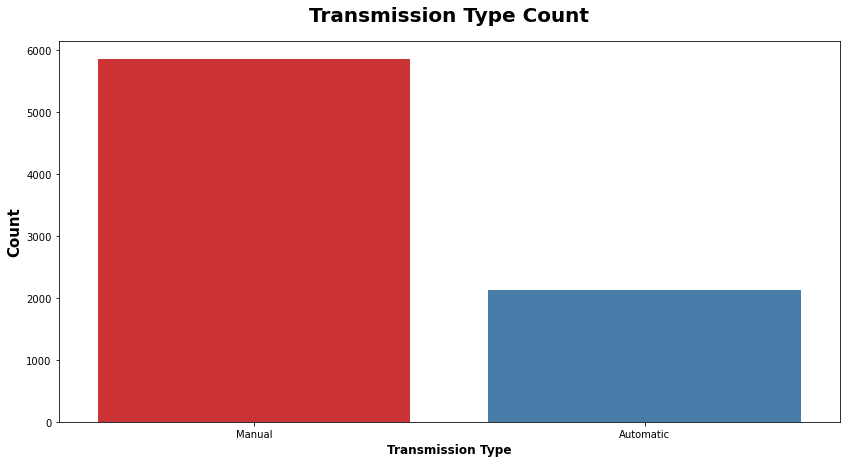

In [34]:
plt.subplots(figsize=(14,7))
sns.countplot(x='TransmissionType', data=df_filtered, palette="Set1")
plt.title("Transmission Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

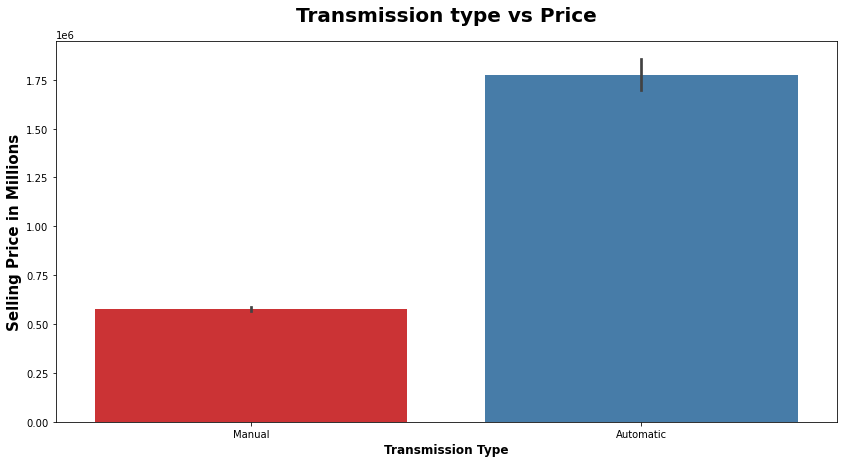

In [35]:
plt.subplots(figsize=(14,7))
sns.barplot(x='TransmissionType', y='Price', data=df_filtered, palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 